In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
blobs = pd.read_csv('/content/sample_data/cluster_two_blobs.csv')
blobs_outl = pd.read_csv('/content/sample_data/cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

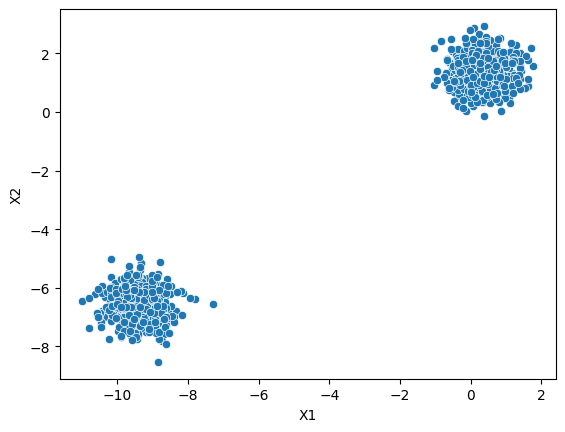

In [3]:
sns.scatterplot(data=blobs, x='X1', y='X2')

<Axes: xlabel='X1', ylabel='X2'>

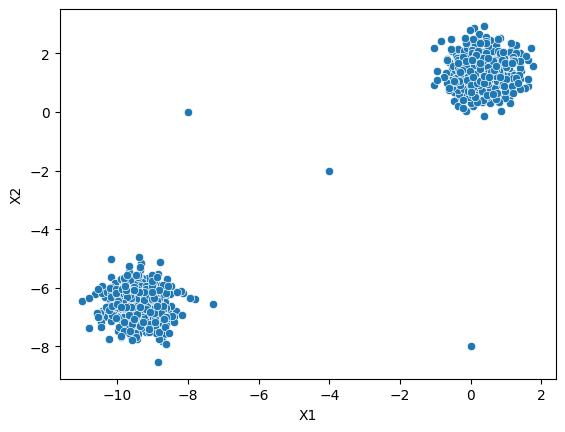

In [4]:
sns.scatterplot(data=blobs_outl, x='X1', y='X2')

In [5]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data = data, x='X1', y='X2', hue=labels,palette='Set1')

In [8]:
from sklearn.cluster import DBSCAN

In [9]:
dbscan = DBSCAN()

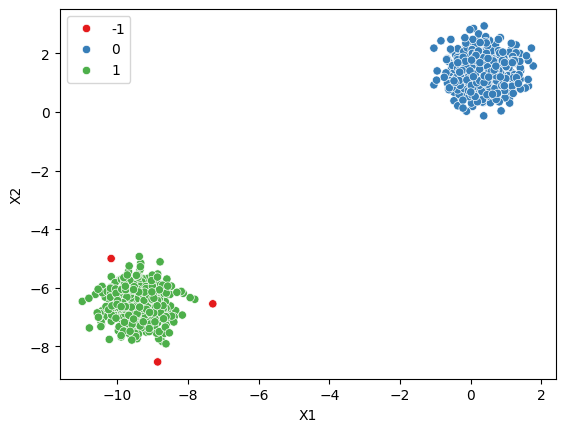

In [10]:
display_categories(dbscan,blobs)

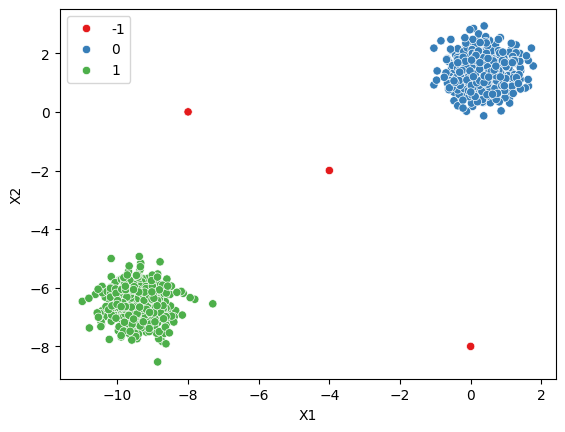

In [14]:
dbscan = DBSCAN(eps = 1)
display_categories(dbscan,blobs_outl)

In [15]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1])

In [16]:
np.sum(dbscan.labels_==-1)

np.int64(3)

In [17]:
100* np.sum(dbscan.labels_==-1)/len(dbscan.labels_)

np.float64(0.29910269192422734)

In [25]:
outlier_percent = []
number_of_outliers =[]

for eps in np.linspace(0.001,7,200):
  dbscan = DBSCAN(eps=eps)
  dbscan.fit(blobs_outl)
  number_of_outliers.append(np.sum(dbscan.labels_==-1))
  outlier_percent.append(100* np.sum(dbscan.labels_==-1)/len(dbscan.labels_))

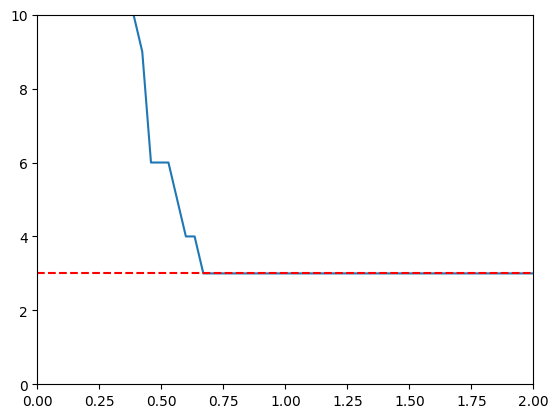

In [35]:
sns.lineplot(x=np.linspace(0.001,7,200),y = number_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=10,linestyles='--',color='red')

In [37]:
outlier_percent = []
number_of_outliers =[]

for n in np.arange(1,100):
  dbscan = DBSCAN(min_samples=n)
  dbscan.fit(blobs_outl)
  number_of_outliers.append(np.sum(dbscan.labels_==-1))
  outlier_percent.append(100* np.sum(dbscan.labels_==-1)/len(dbscan.labels_))

Text(0, 0.5, 'Perc of points outlier')

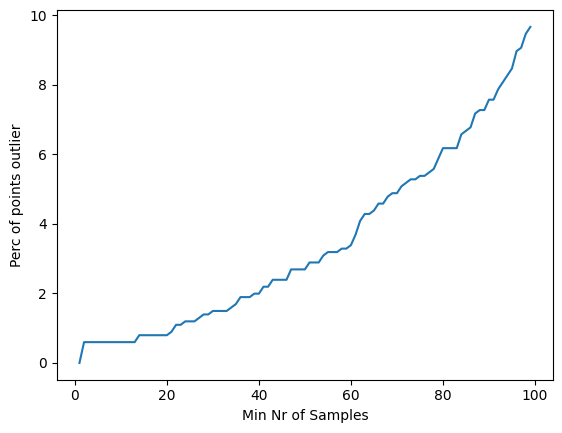

In [41]:
sns.lineplot(x=np.arange(1,100),y = outlier_percent)
plt.xlabel('Min Nr of Samples')
plt.ylabel('Perc of points outlier')
# plt.xlim(0,2)
# plt.ylim(0,10)